# Plotting

If you are working with data, at some point you will want to plot it. Here we introduce plotting at first through pandas, and them move on to matplotlib.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
combined = pd.read_csv("data/combined_population_votes.csv", index_col='State')
combined.head(7)

,Population,Votes,popmills
State,,,
Alaska,710000,3,0.710
Alabama,4780000,9,4.780
Arkansas,2916000,6,2.916
Arizona,6392000,11,6.392
California,37254000,55,37.254
Colorado,5029000,9,5.029
Connecticut,3574000,7,3.574


## Plotting using Pandas

You can make simple plots very easily with pandas:

A bar graph uses bars to compare data among different categories. Note this is the `plot` method of the Pandas `Series` object

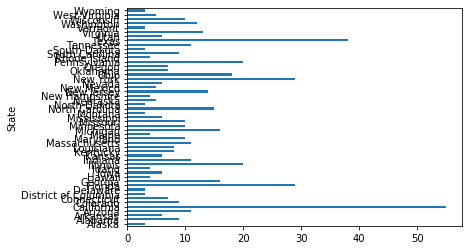

In [4]:
combined['Votes'].plot(kind="barh")

Well that isnt quite readable. Pandas plots are actually matplotlib plots, and we can use matplotlib commands to set ourselves up. Here we increase the vertical size of the **current figure**, created by calling `plt.figure`. Pandas will then plot into the current figure

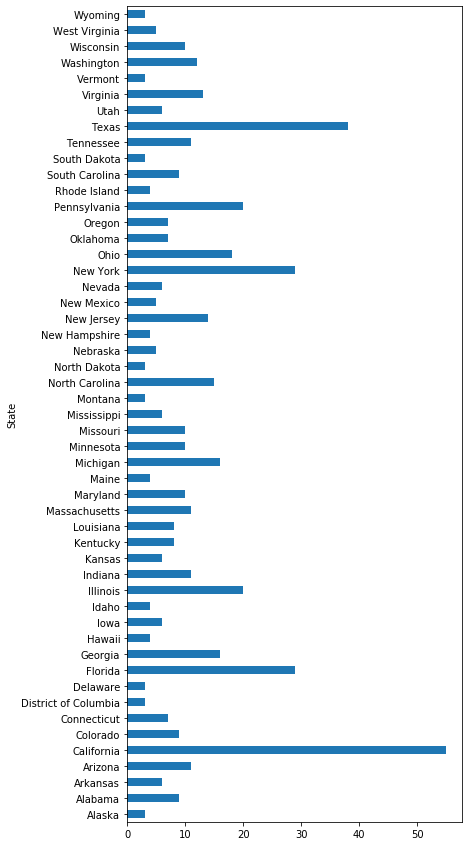

In [5]:
plt.figure(figsize = (6, 15))
combined['Votes'].plot(kind="barh");

Ok, so thats better. What is happening under the hood is that a figure is created, and then the figure holds a set of axes, and these are what pandas seizes upon to do its plotting into.

More explicitly:

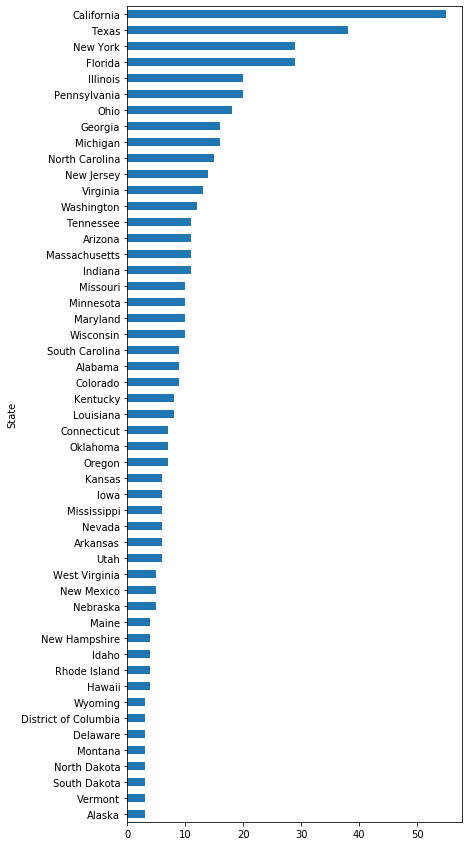

In [6]:
fig = plt.figure(figsize = (6, 15))
ax = fig.gca() # get current axes for figure
combined['Votes'].sort_values(ascending = True).plot(ax=ax, kind="barh");

Bar charts are not the only kind of charts pandas supports. You can do histograms as well.

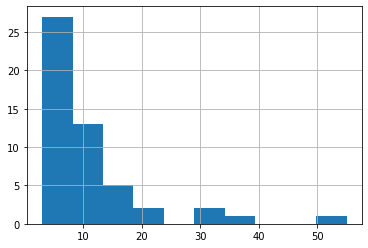

In [7]:
combined.Votes.hist()

## Coarse and fine grain

Histograms depend on the binzsize, or number of bins. Here we are looking at the number of electoral votes, so you might want to see all the individual votes in states

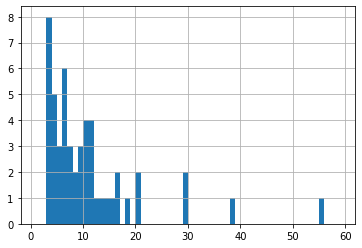

In [8]:
combined.Votes.hist(bins=np.arange(1, 60, 1, dtype='int'))

But going down to this amount of bins, or fine-grain, often hides structure in the data. Perhaps a binning every 5 votes tells us more about which states have more power. Here you see that there are 18 stated with 20 votes, but 8 states with 10-15, and 5 states with 15 and 20 that have significant power

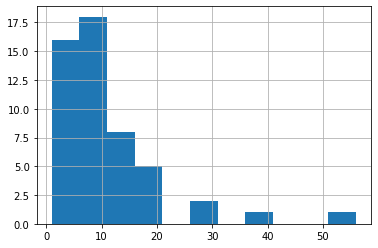

In [9]:
combined.Votes.hist(bins=np.arange(1, 60, 5, dtype='int'));

If you coarse grain too much, you are not getting any useful information. 40 states have upto 15 electoral votes..

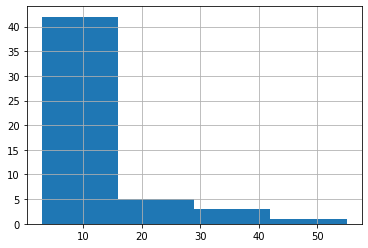

In [10]:
combined.Votes.hist(bins=4);

## Plots and scatterplots in pandas

There are many plotting routines in pandas, but let us see how to do scatter plots and line plots in pandas, as these types are the ones you encounter the most. (all options at https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

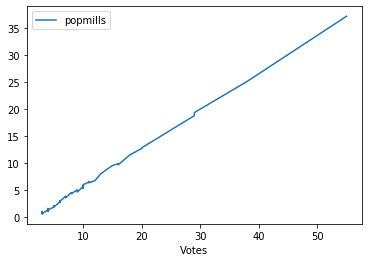

In [11]:
combined.sort_values('Votes').plot(x = 'Votes', y='popmills')

A line plot is not really the right kind of plot to use for this. It makes no sense to connect these points..they are just different states. And we had to sort to make sure the lines were not all over the place.

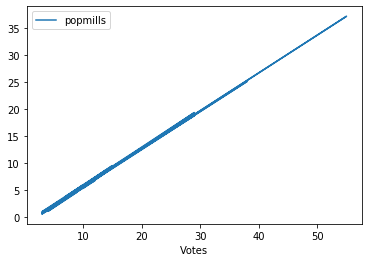

In [12]:
combined.plot(x = 'Votes', y='popmills')

In these situations we actually want to use a scatter plot

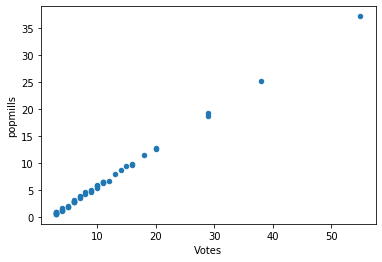

In [13]:
combined.plot.scatter(x = 'Votes', y='popmills')

This gives you a much better idea of where the density of the points is. But suffers from issues of maybe these dots are too large, too dark, and there is no title. Since this is a matplotlib plot, you can combine matplotlib and pandas commands to fix this (its nice that pandas gives us axis labels). But we might as well see how to do this from scratch in matplotlib.

## Plotting with matplotlib

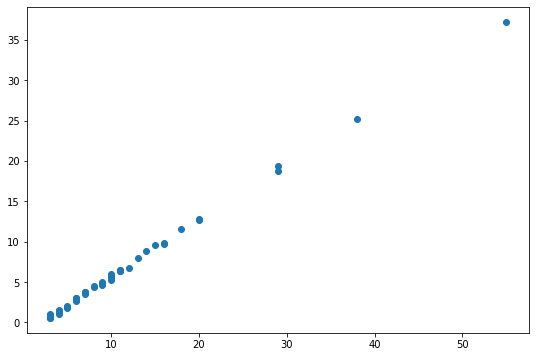

In [14]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
plt.scatter(combined.Votes, combined.popmills)

But we have lost our labels. Lets put them and a title back. Lets also make the dots more transparent (`alpha`) so that the density is clearer

Text(0.5, 1.0, 'Population vs Electoral Votes amongst US States (2012)')

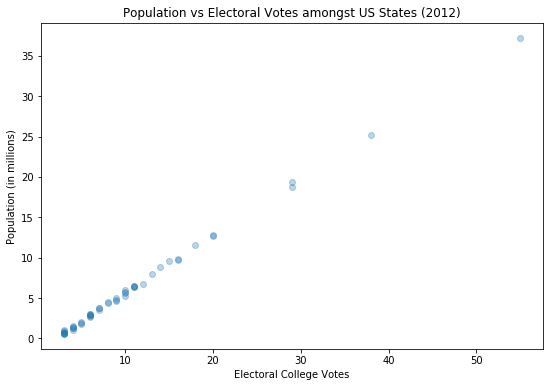

In [15]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
plt.scatter(combined.Votes, combined.popmills, alpha=0.3)
plt.xlabel("Electoral College Votes")
plt.ylabel("Population (in millions)")
plt.title("Population vs Electoral Votes amongst US States (2012)")

Now the density is much clearer. We can also change the axes limits to zoom in. The marker size can be reduced as well, (and made a square) though we might want to increase the alpha to compensate

Text(0.5, 1.0, 'Population vs Electoral Votes amongst US States (2012)')

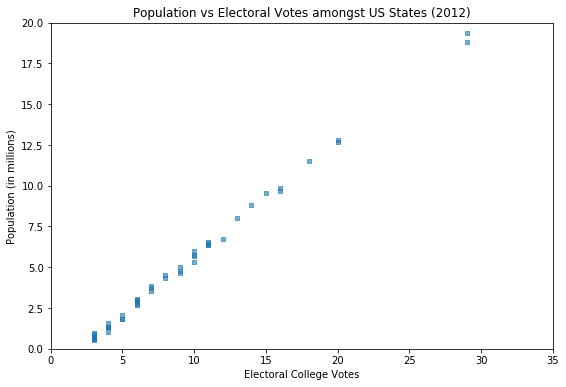

In [16]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
plt.scatter(combined.Votes, combined.popmills, alpha=0.6, s=10, marker='s')
plt.xlabel("Electoral College Votes")
plt.xlim((0, 35))
plt.ylabel("Population (in millions)")
plt.ylim((0, 20))
plt.title("Population vs Electoral Votes amongst US States (2012)")

We can combine the plot line type and marker type as the third argument to `plot`, as seen below.

Text(0.5, 1.0, 'Population vs Electoral Votes amongst US States (2012)')

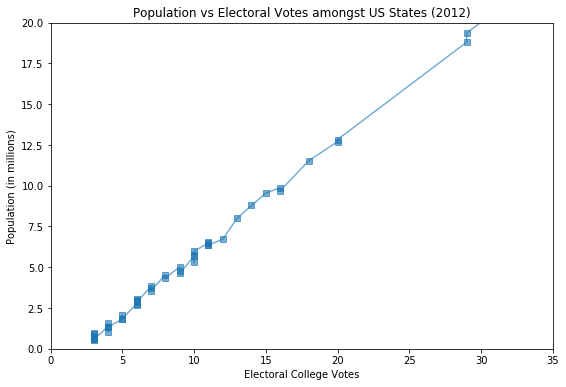

In [67]:
sortcombined = combined.sort_values('Votes')
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
plt.plot(sortcombined.Votes, sortcombined.popmills, 's-', alpha=0.6)
plt.xlabel("Electoral College Votes")
plt.xlim((0, 35))
plt.ylabel("Population (in millions)")
plt.ylim((0, 20))
plt.title("Population vs Electoral Votes amongst US States (2012)")

Confusingly enough, marker size in `plot`s as opposed to `scatter`s gets the argument `ms`, as you can see here. We have also changed the color.

Text(0.5, 1.0, 'Population vs Electoral Votes amongst US States (2012)')

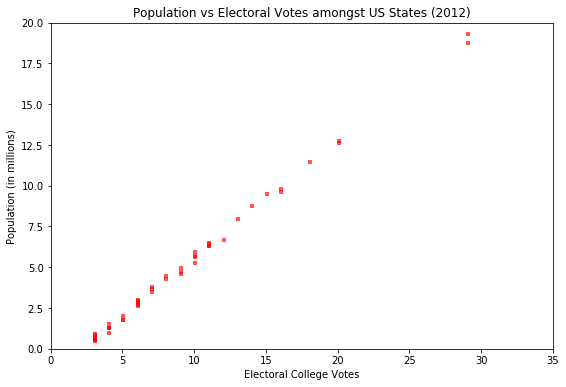

In [71]:
sortcombined = combined.sort_values('Votes')
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
plt.plot(sortcombined.Votes, sortcombined.popmills, 's', color='red', ms='3', alpha=0.6)
plt.xlabel("Electoral College Votes")
plt.xlim((0, 35))
plt.ylabel("Population (in millions)")
plt.ylim((0, 20))
plt.title("Population vs Electoral Votes amongst US States (2012)")

The plain matplotlib interface can be used for histograms and bar charts as well. Here we show histograms

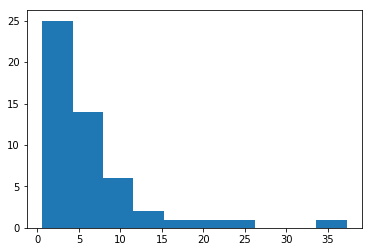

In [108]:
plt.hist(combined.popmills);

## Saving Figures

Now that we have made this figure, we might want to save it.

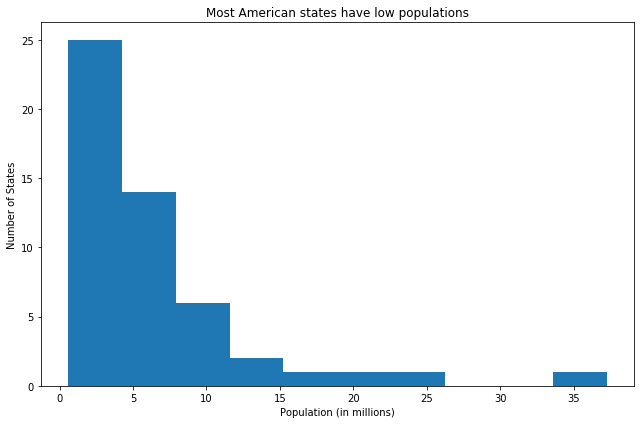

In [17]:
plt.figure(figsize = (9, 6))
plt.hist(combined.popmills.values);
plt.ylabel("Number of States")
plt.xlabel("Population (in millions)")
plt.title("Most American states have low populations");
plt.tight_layout() #  makes sure nothing is clipped in saving
plt.savefig("images/histo.png", transparent=True)
plt.savefig("images/histo.pdf")

We use `transparent` in pngs so that we can load it on any background web page. If ou are seeing this in our platform, the background should be our usual yellowish one)

Lets load the file in using markdown

![](images/histo.png)

## Multiple Plots

It is very easy to create subplots in matplotlib as well. Here is a quick and dirty example. 

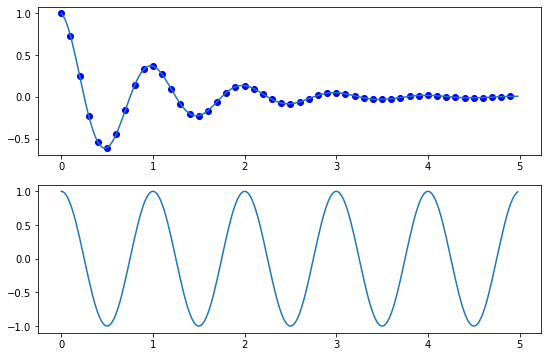

In [18]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure(figsize = (9, 6))
plt.subplot(211) # 2 rows, 1 column, 1st plot
plt.plot(t1, f(t1), 'bo', t2, f(t2))
plt.subplot(212) # 2 rows, 1 column, 2nd plot
plt.plot(t2, np.cos(2*np.pi*t2))
plt.show()

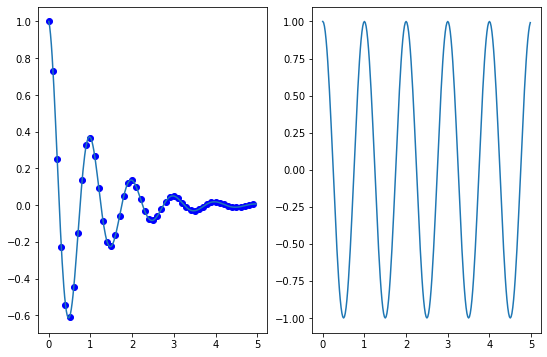

In [19]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure(figsize = (9, 6))
plt.subplot(121) # 1 row, 2 columns, 1st plot
plt.plot(t1, f(t1), 'bo', t2, f(t2))
plt.subplot(122) # 1 row, 2 columns, 2nd plot
plt.plot(t2, np.cos(2*np.pi*t2))
plt.show()

There are better ways to lay out subplots using the object oriented API and "gridspec", but those are more advanced topics

At this point you would be totally forgiven in thinking that this is an unholy mess of `plt` and `ax` commands. It is. And its worse. As you can see from `ax=plt.gca()` there is a global notion of current axis. Global state is bad!

This is a function of using matplotlib's matlab-style "pyplot" api. It makes quick and dirty plots with `plt` very easily, and indeed using pandas we can make it even easier. But it is a holdover from matplotlib being a clone of matlab's (bad) plotting routines.

## The matplotlib object oriented API

Matplotlib has a very similar but more sane api which sets up a figure and an axis as instances of classes. The rather schizophrenic calls to `plt` and ax are now replaced by methods, rather than relying on some global state`gca`.

We dont have much space to go into the object oriented API here, so we will just re-implement the previous example using it. But there are some basic priciples you want to follow.

If you are interested in more details, see Brandon Rohrer's excellent free matplotlib course at https://end-to-end-machine-learning.teachable.com/p/navigating-matplotlib-tutorial-how-to/ .

For us though, the main thing to know is that figures hold axes, and axes hold lines. This plot from the above course illustrates this well:

![](https://github.com/brohrer/taming_matplotlib/raw/master/images/objects_v2.svg.png)


This is the NOT object-oriented scatter plot:

Text(0.5, 1.0, 'Population vs Electoral Votes amongst US States (2012)')

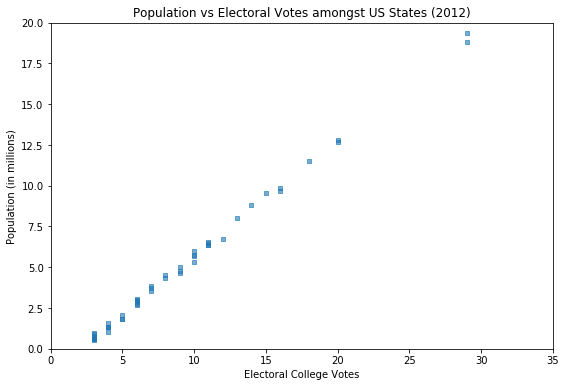

In [118]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
plt.scatter(combined.Votes, combined.popmills, alpha=0.6, s=10, marker='s')
plt.xlabel("Electoral College Votes")
plt.xlim((0, 35))
plt.ylabel("Population (in millions)")
plt.ylim((0, 20))
plt.title("Population vs Electoral Votes amongst US States (2012)")

And now in object oriented style:

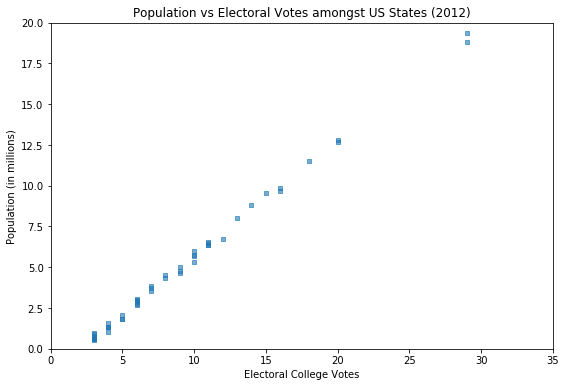

In [123]:
fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(combined.Votes, combined.popmills, alpha=0.6, s=10, marker='s')
ax.set_xlabel("Electoral College Votes")
ax.set_xlim((0, 35))
ax.set_ylabel("Population (in millions)")
ax.set_ylim((0, 20))
ax.set_title("Population vs Electoral Votes amongst US States (2012)");

Notice how `ax` has `get_` and `set_` methods. W So some of the usual `plt` functions on the global figure are now available as methods on the `ax` objects. This makes it simple to even address multiple axes objects inside a figure, something that we will see later. Meanwhile, lets save this image and see it:

In [20]:
fig.tight_layout()
fig.savefig("images/scatter.png", transparent=True)

Here is the image

![](images/scatter.png)

The multiple plots example can be cast in this format too:

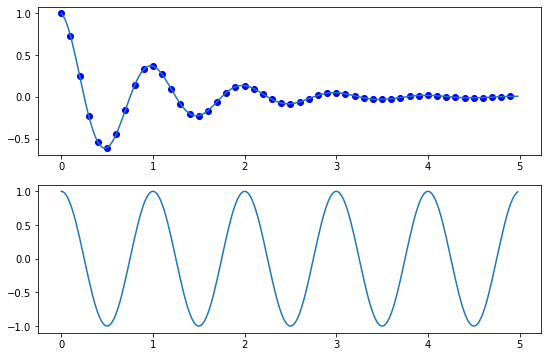

In [21]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
# 2 rows, 1 column
fig, axes = plt.subplots(2, 1, figsize = (9, 6))
axes[0].plot(t1, f(t1), 'bo', t2, f(t2))
axes[1].plot(t2, np.cos(2*np.pi*t2))

If we have 2 rows and 2 columns we get a 2d array

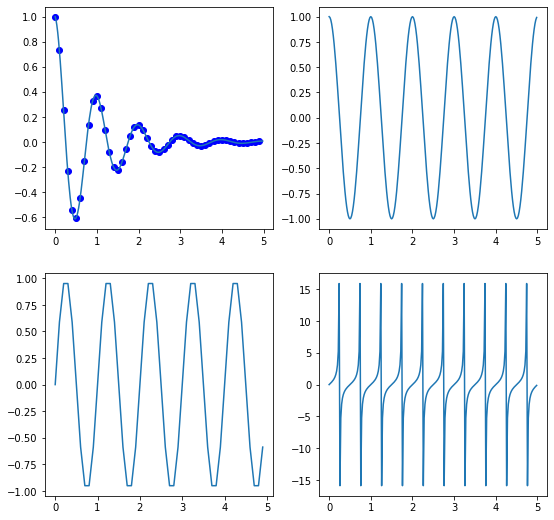

In [22]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
# 2 rows, 1 column
fig, axes = plt.subplots(2, 2, figsize = (9, 9))
axes[0][0].plot(t1, f(t1), 'bo', t2, f(t2))
axes[0][1].plot(t2, np.cos(2*np.pi*t2))
axes[1][0].plot(t1, np.sin(2*np.pi*t1))
axes[1][1].plot(t2, np.tan(2*np.pi*t2))